In [1]:
!pip install pyimkernel

In [2]:
!pip show pyimkernel

In [3]:
import mnist
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from pyimkernel import ApplyKernels, ManipulatePixels
import os 

In [4]:
X_train, X_test, y_train, y_test = mnist.train_images(), mnist.test_images(), mnist.train_labels(), mnist.test_labels()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
imkernel = ApplyKernels(random_seed=0)
manipulation = ManipulatePixels()

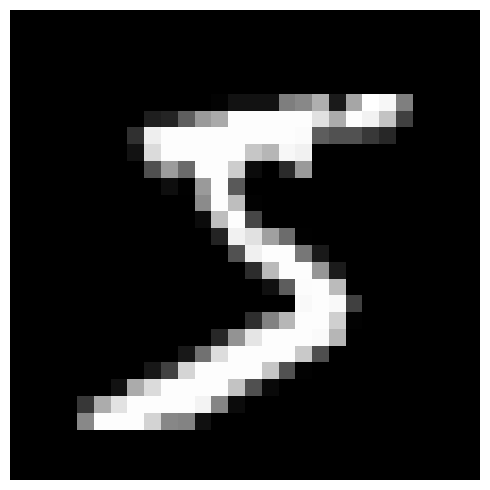

In [8]:
imkernel.imshow(
    image=X_train[0],
    cmap=plt.cm.gray
)

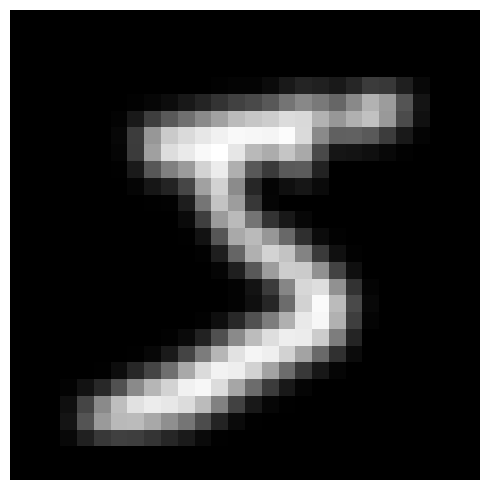

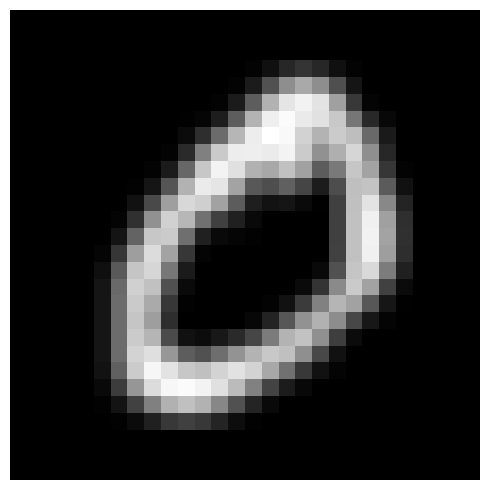

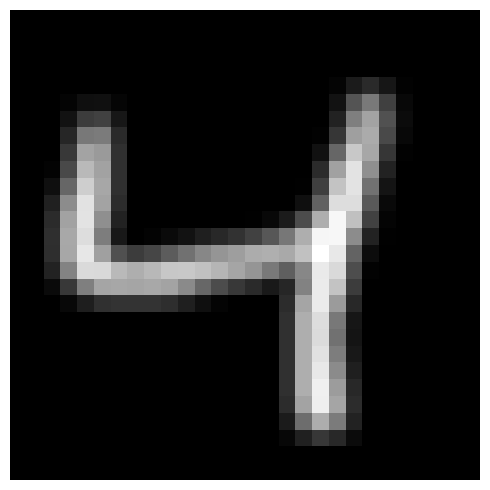

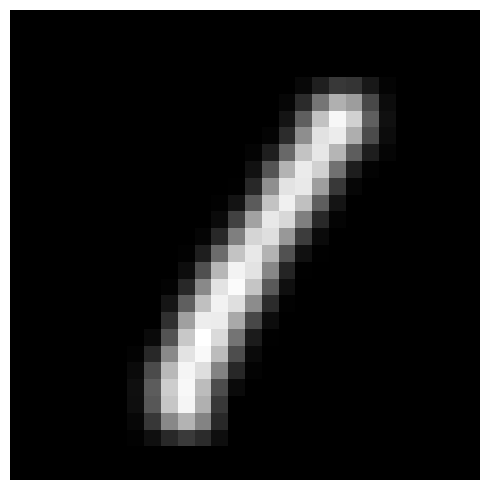

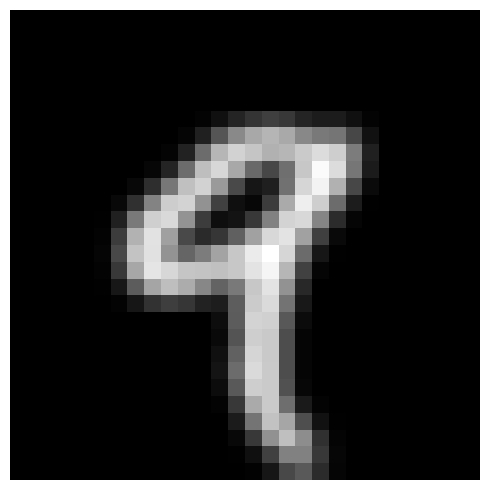

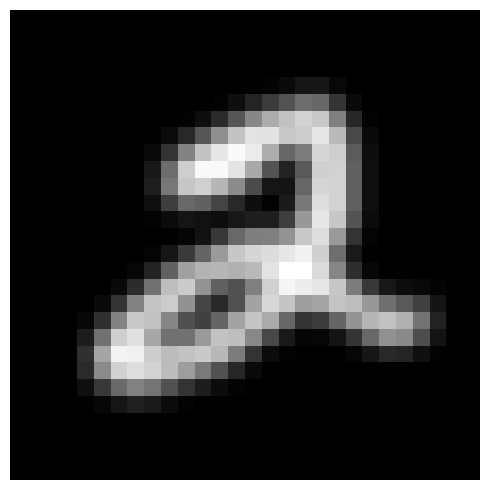

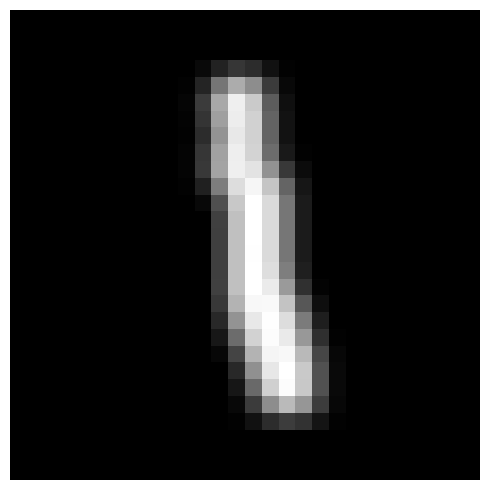

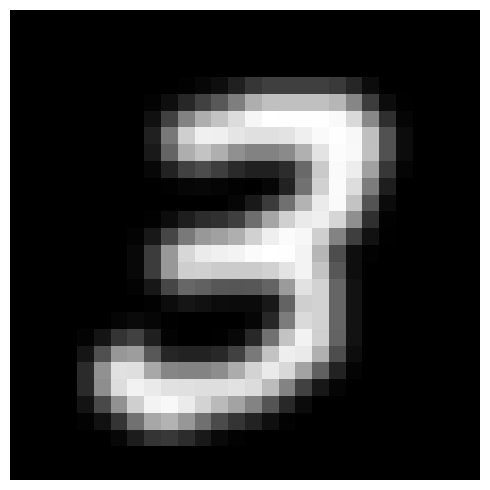

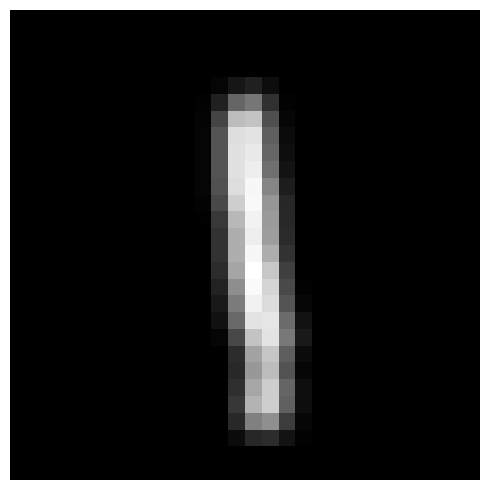

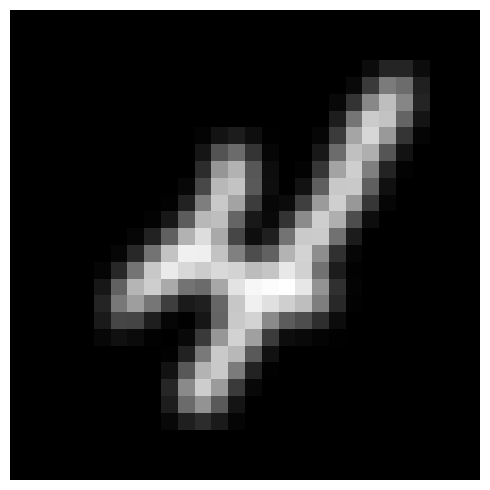

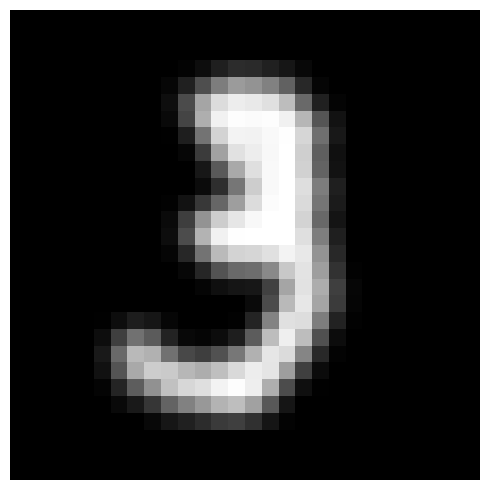

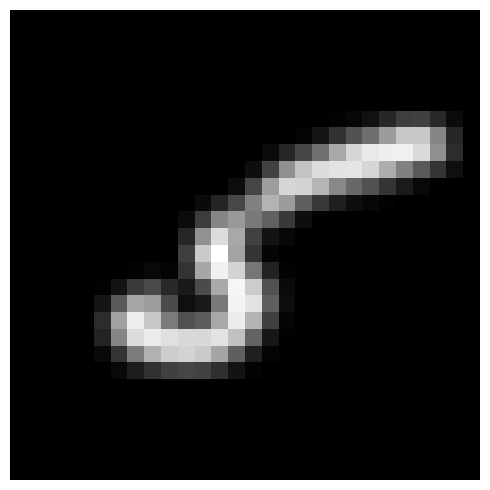

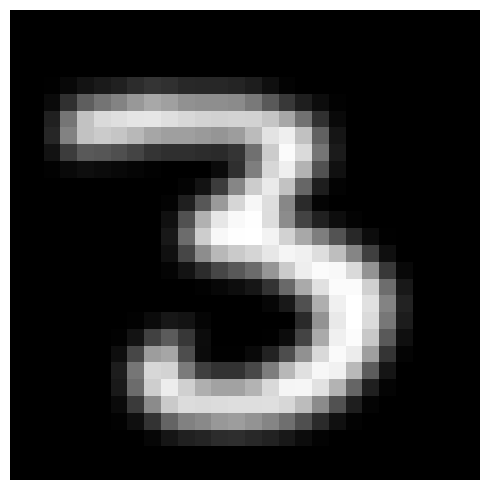

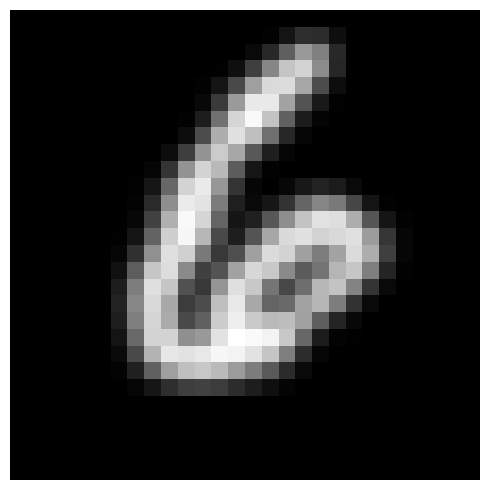

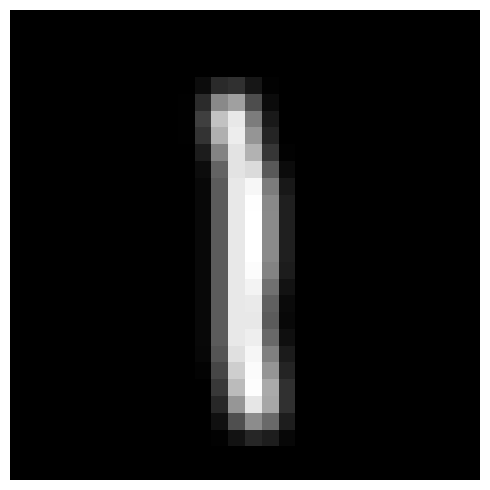

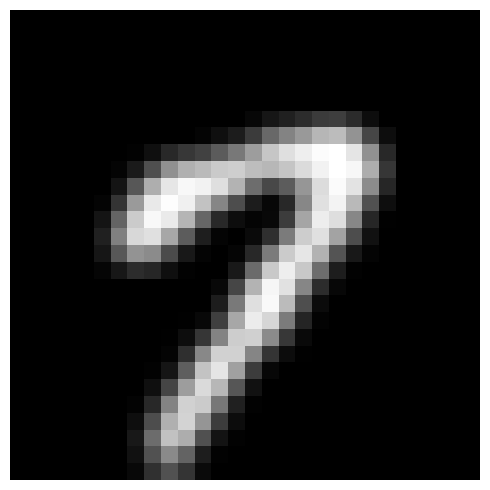

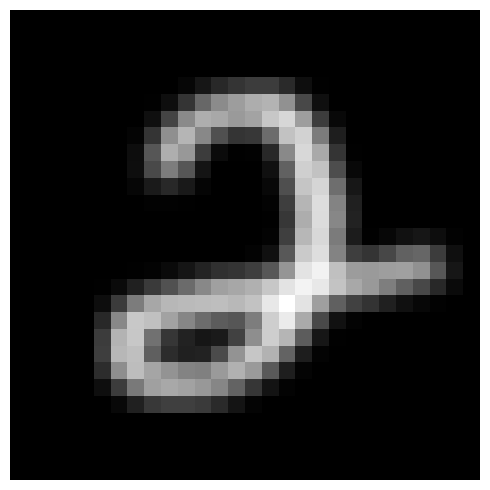

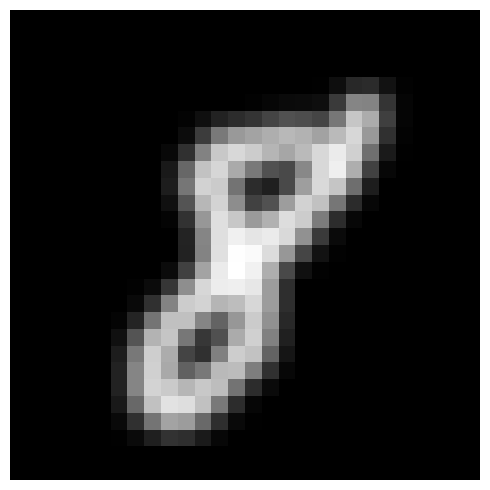

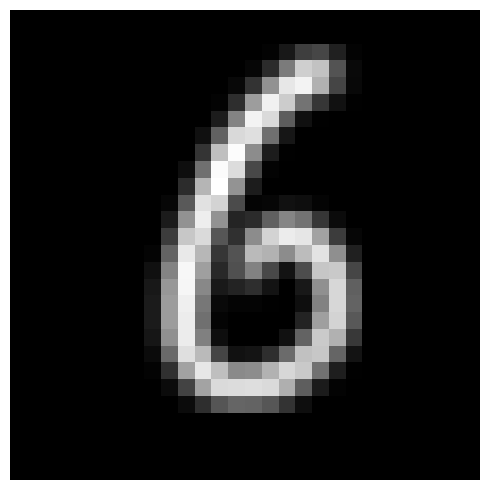

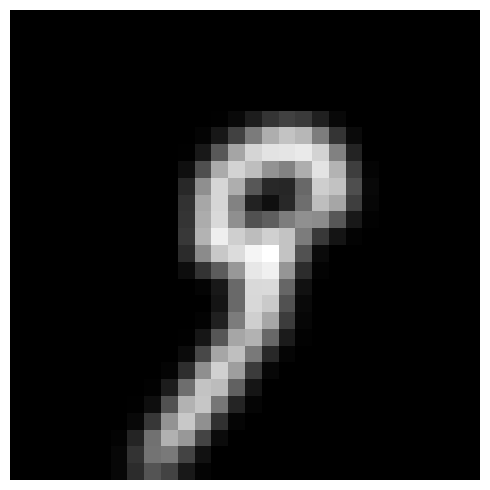

In [9]:
for i in range(20):
    imkernel.imshow(
        image=imkernel.apply_filter_on_gray_img(
            X_train[i],
            kernel_name='guassian blur',
            kernel_size=(3, 3),
        ),
        cmap=plt.cm.gray
    )

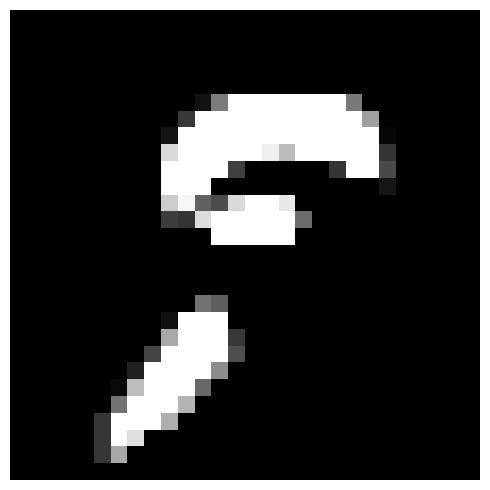

In [10]:
# 5x5 Prewitt Horizontal Edge Kernel
kernel_value = np.array([[-1, -1, -1, -1, -1],
                         [-1, -1, -1, -1, -1],
                         [0,   0,  0,  0,  0],
                         [1,   1,  1,  1,  1],
                         [1,   1,  1,  1,  1]])
imkernel.imshow(
    image=imkernel.apply_filter_on_gray_img(
        X_train[19],
        kernel_name='custom',
        kernel_value=kernel_value
    ),
    cmap=plt.cm.gray
)

In [11]:
image1 = cv2.imread(
    os.path.join('Images', '1.jpg')
)

In [12]:
image1.shape

(499, 635, 3)

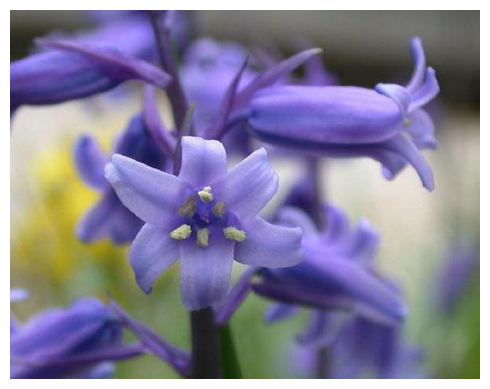

In [13]:
imkernel.imshow(
    cv2.cvtColor(image1, cv2.COLOR_BGR2RGB),
    figsize=(5, 5)
)

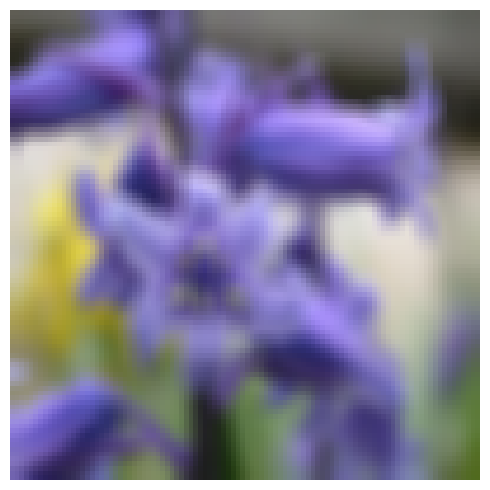

In [14]:
# 5x5 box blur
kernel_value = (1 / 25.0) * np.array([[1, 1, 1, 1, 1],
                                      [1, 1, 1, 1, 1],
                                      [1, 1, 1, 1, 1],
                                      [1, 1, 1, 1, 1],
                                      [1, 1, 1, 1, 1]])

blurred_image = imkernel.apply_filter_on_color_img(
    image1,
    kernel_name='custom',
    kernel_value=kernel_value,
    with_resize=True,
    dsize=(100, 100)
)
imkernel.imshow(
    image=cv2.cvtColor(
        blurred_image,
        cv2.COLOR_BGR2RGB
    ))

In [15]:
blurred_image.shape # a color-scale image

(100, 100, 3)

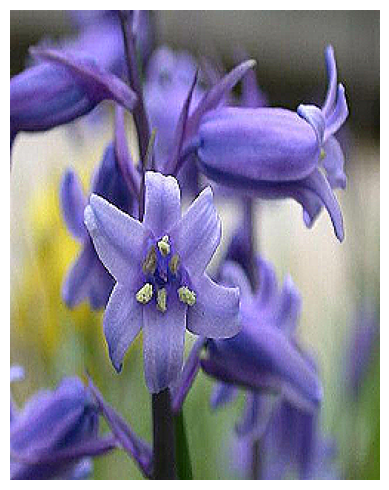

In [16]:
sharpened_image = imkernel.apply_filter_on_color_img(
    image1,
    kernel_name='sharpen',
    kernel_size=(3, 3),
    with_resize=True,
)
imkernel.imshow(
    image=cv2.cvtColor(
        sharpened_image,
        cv2.COLOR_BGR2RGB
    ))

In [17]:
sharpened_image.shape

(318, 250, 3)

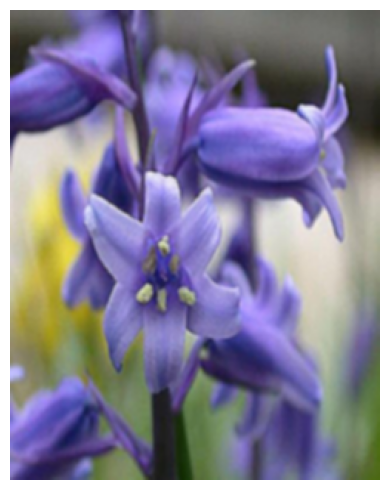

In [18]:
imkernel.imshow(
    image=cv2.cvtColor(
        imkernel.apply_filter_on_color_img(
            sharpened_image, 
            kernel_name='soften',
            kernel_size=(5, 5)
        ),
    cv2.COLOR_BGR2RGB
    ))

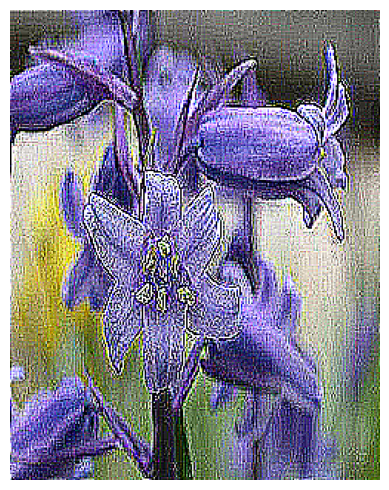

In [19]:
imkernel.imshow(
    image=cv2.cvtColor(
        imkernel.apply_filter_on_color_img(
            sharpened_image,
            kernel_name='unsharp masking',
            kernel_size=(3, 3)
        ),
    cv2.COLOR_BGR2RGB
    ))

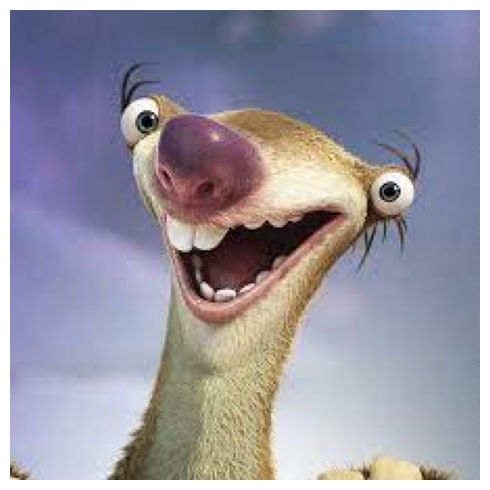

In [20]:
image2 = cv2.imread(
    os.path.join('Images', 'ice-age.jpeg')
)

imkernel.imshow(
    cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
)

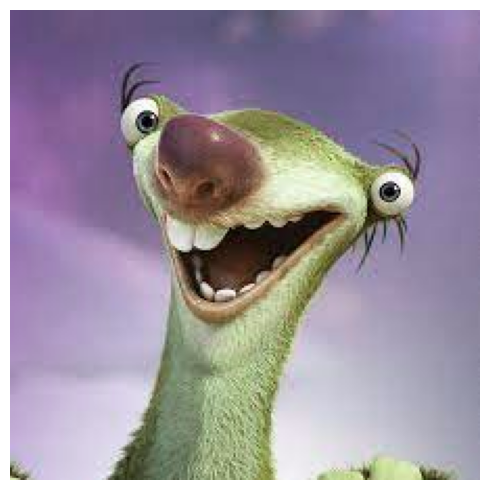

In [21]:
im = manipulation.hue_rotate(
    Image.fromarray(
        cv2.cvtColor(
            image2, cv2.COLOR_BGR2RGB
        )),
    degree=30
)

manipulation.imshow(im)

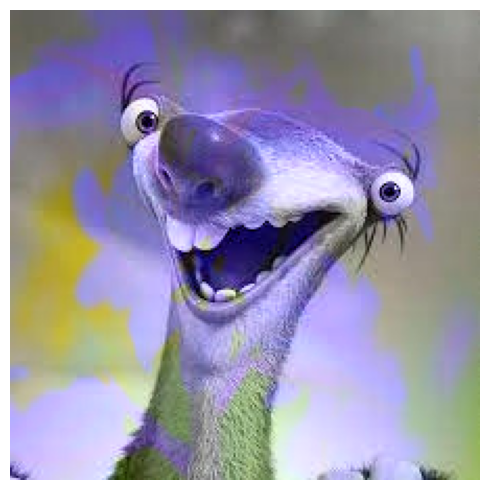

In [22]:
im = manipulation.color(
    Image.fromarray(image2),
    Image.fromarray(
        cv2.resize(
            cv2.cvtColor(
                image1, cv2.COLOR_BGR2RGB
            ),
        image2.shape[:2])
    ))
manipulation.imshow(im)